In [1]:
from importlib import import_module
import tensorflow as tf
import keras
from keras.api._v2 import keras as KerasAPI
keras: KerasAPI = import_module("tensorflow.keras")
print(tf.__version__)

from keras import Model, layers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils import plot_model

from keras.utils import load_img
from keras.utils import img_to_array

import os
import shutil

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

2.10.0


In [2]:
path = ''
# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/deepLearningAs3/'

pathfinal = path + 'model_history_I_tempb/'
pathfinal2 = path + 'model_images/'

epoch_val = 3000
batch_size_val = 32
threshold_val = 1e-4
# inputShape = 256

random_state_global = 42
learning_rate_val = 1e-3

Hidden_layer_I_N = 30
Hidden_layer_II_N = 30
Hidden_layer_III_N = 30
Output_layer_N = 5

Hidden_layer_Activation = "tanh"
Output_layer_Activation = "softmax"

epsilon_val = 1e-8
beta_1_val = 0.9
beta_2_val = 0.999


class_l_r_to_d = {0:0, 1:1, 2:2, 4:3, 9:4}
class_l_d_to_r = {0:0, 1:1, 2:2, 3:4, 4:9}

In [3]:

def delete_folder_contents(pathfinal):
    folder_name = pathfinal
    # Get all files in the folder
    files = os.listdir(folder_name)

    # Loop through the files and delete them
    for file in files:
        file_path = os.path.join(folder_name, file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            if os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print(f"Error deleting {file_path}: {e}")

delete_folder_contents(pathfinal)

read and saving data

In [4]:
%%script echo skipping
# level 0 path
l0 = 'Group_20'

DATASET = {0:pd.DataFrame(), 1:pd.DataFrame(), 2:pd.DataFrame()}
temp_dict = {'train':0, 'val':1, 'test':2}

# iterate over files in
# that l0
for l1 in os.listdir(l0):
    f1 = os.path.join(l0, l1)
    for l2 in os.listdir(f1):
        f2 = os.path.join(f1, l2)
        for l3 in os.listdir(f2):
            f3 = os.path.join(f2, l3)
            # print(f3)
            img = load_img(f3, color_mode = "grayscale")
            data_point = tf.squeeze(tf.constant(img_to_array(img)))
            # print("shape:", data_point.shape) # shape: (28, 28)
            # data_point = data_point/255
            # print(tf.math.reduce_min(data_point), tf.math.reduce_max(data_point))
            # plt.imshow(data_point)
            # plt.show()

            temp = tf.reshape(data_point, shape=[-1]).numpy().tolist()
            
            #appending label
            temp.append(int(l2))

            # print("shape:",temp.shape) #shape: (784,)
            row = pd.Series(temp)
            # print('1')
            DATASET[temp_dict[l1]] = pd.concat([DATASET[temp_dict[l1]], row], axis=1)
            # plt.imshow(tf.reshape(temp, shape=(28,28)))
            # plt.show()


df_train = DATASET[0].transpose()
df_valid = DATASET[1].transpose()
df_test = DATASET[2].transpose()

## saving data
df_train.to_csv('df_train.csv', index=False)
df_valid.to_csv('df_valid.csv', index=False)
df_test.to_csv('df_test.csv', index=False)

skipping


In [5]:
def label_encoding(df):
    df[df.columns[-1]] = LabelEncoder().fit_transform(df.iloc[:,-1])
    return df

def normalizing_data(df):
    temp = df[df.columns[-1]]
    df = df/255
    df[df.columns[-1]] = temp
    return df

# plt.figure(figsize=(7, 10))
def data_visualize(df):
  np.random.seed(random_state_global)
  fig, axis = plt.subplots(3, 3, figsize=(6, 6))
  axis = axis.reshape(-1)
  for i in range(9):
    rand_index = np.random.choice(range(len(df)))
    axis[i].imshow(tf.reshape(df.iloc[rand_index,:-1], shape=(28,28)))
    axis[i].set_title(f'{class_l_d_to_r[df.iloc[rand_index,-1]]}')
    axis[i].axis(False)
  fig.suptitle("Data")
  plt.tight_layout()

In [6]:
df_train = pd.read_csv(path+'df_train.csv', dtype='float32')
df_valid = pd.read_csv(path+'df_valid.csv', dtype='float32')
df_test = pd.read_csv(path+'df_test.csv', dtype='float32')

print('df_train:', df_train.groupby(['784']).count().iloc[:,-1].to_dict())
print('df_valid:', df_valid.groupby(['784']).count().iloc[:,-1].to_dict())
print('df_test:', df_test.groupby(['784']).count().iloc[:,-1].to_dict())
print()

print(f'Initial Data Range: {min(df_train.iloc[:,:-1].min())} to {max(df_train.iloc[:,:-1].max())}')

df_train = label_encoding(normalizing_data(df_train))
df_valid = label_encoding(normalizing_data(df_valid))
df_test = label_encoding(normalizing_data(df_test))
print(f'Final Data Range: {min(df_train.iloc[:,:-1].min())} to {max(df_train.iloc[:,:-1].max())}')
print('Label Encoded')

print('Train Data',df_train.shape)
print('Valid Data',df_valid.shape)
print('Test Data' ,df_test.shape)

df_train: {0.0: 2277, 1.0: 2277, 2.0: 2277, 4.0: 2277, 9.0: 2277}
df_valid: {0.0: 759, 1.0: 759, 2.0: 759, 4.0: 759, 9.0: 759}
df_test: {0.0: 759, 1.0: 759, 2.0: 759, 4.0: 759, 9.0: 759}

Initial Data Range: 0.0 to 255.0
Final Data Range: 0.0 to 1.0
Label Encoded
Train Data (11385, 785)
Valid Data (3795, 785)
Test Data (3795, 785)


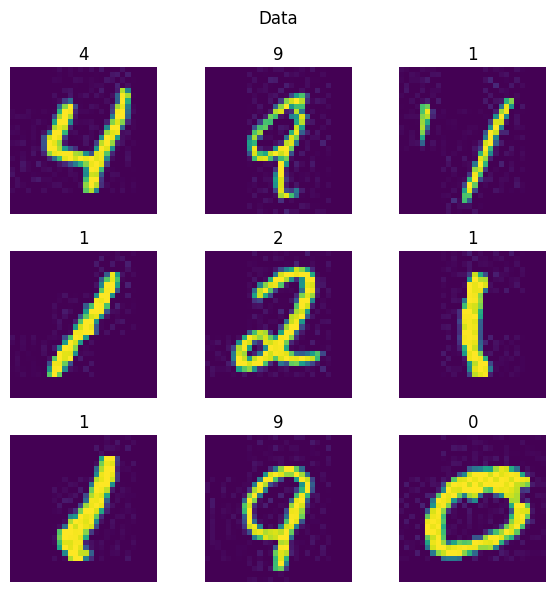

In [7]:
data_visualize(df_train)

In [8]:
# Import label encoder
ll = [9,9,4,0,0,1,2]
print(LabelEncoder().fit_transform(ll))

print(ll)

[4 4 3 0 0 1 2]
[9, 9, 4, 0, 0, 1, 2]


In [9]:
# In this case error is relative to per sample(whole input or output dimension) # loss function for reconstruction autoencoder FCNN
def pca_mse_I(df_train, X_projected):
    return np.sum((df_train.iloc[:,:-1].to_numpy() - X_projected.iloc[:,:-1].to_numpy()) ** 2, axis=1).mean()

# same as mean_squared_error from scikit learn
# In this case error is relative to per dimension
def pca_mse_II(df_train, X_projected):
    return pca_mse_I(df_train, X_projected)/df_train.shape[1] # or 
    # return np.mean((df_train.iloc[:,:-1].to_numpy() - X_projected.iloc[:,:-1].to_numpy()) ** 2, axis=1).mean()

def dimension_reduction(df_train, df_valid, df_test, n_components):
    # scaling=StandardScaler()
    # scaling.fit(df_train.iloc[:,:-1])
    # Scaled_data=scaling.transform(df_train.iloc[:,:-1])
    

    pca=PCA(n_components=n_components, random_state=random_state_global)
    pca.fit(df_train.iloc[:,:-1])
    # print(pca.components_.shape)
    # pca.components_

    df_train_tr=pd.DataFrame(pca.transform(df_train.iloc[:,:-1]))
    df_train_tr[df_train_tr.shape[1]] = df_train.iloc[:,-1]
    df_train_rec = pd.DataFrame(pca.inverse_transform(df_train_tr.iloc[:,:-1]))
    df_train_rec[df_train_rec.shape[1]] = df_train.iloc[:,-1]


    df_valid_tr=pd.DataFrame(pca.transform(df_valid.iloc[:,:-1]))
    df_valid_tr[df_valid_tr.shape[1]] = df_valid.iloc[:,-1]
    df_valid_rec = pd.DataFrame(pca.inverse_transform(df_valid_tr.iloc[:,:-1]))
    df_valid_rec[df_valid_rec.shape[1]] = df_valid.iloc[:,-1]
    
    df_test_tr=pd.DataFrame(pca.transform(df_test.iloc[:,:-1]))
    df_test_tr[df_test_tr.shape[1]] = df_test.iloc[:,-1]
    df_test_rec = pd.DataFrame(pca.inverse_transform(df_test_tr.iloc[:,:-1]))
    df_test_rec[df_test_rec.shape[1]] = df_test.iloc[:,-1]
    
    return (df_train_tr, df_valid_tr, df_test_tr, df_train_rec, df_valid_rec, df_test_rec)


n_components_list = [32, 64, 128, 256]
df_dict = {}
df_dict_rec = {}
for i in range(len(n_components_list)):
    df_train_tr, df_valid_tr, df_test_tr, df_train_rec, df_valid_rec, df_test_rec = dimension_reduction(df_train, df_valid, df_test, n_components_list[i])
    df_dict[i] = (df_train_tr, df_valid_tr, df_test_tr)
    df_dict_rec[i] = (df_train_rec, df_valid_rec, df_test_rec)



In [10]:
print(df_train.shape)
print(df_dict_rec[0][0].shape)

(11385, 785)
(11385, 785)


In [11]:
11/785

0.014012738853503185

In [12]:
print(f'Mean Squared Error: {mean_squared_error(df_train.iloc[:,:-1], df_dict_rec[0][0].iloc[:,:-1])}')
print(f'Mean Squared Error: {pca_mse_I(df_train.iloc[:,:-1], df_dict_rec[0][0].iloc[:,:-1])} = 784 times 0.01436248142272234')
print(f'Mean Squared Error: {pca_mse_II(df_train.iloc[:,:-1], df_dict_rec[0][0].iloc[:,:-1])}')

Mean Squared Error: 0.01436248142272234
Mean Squared Error: 11.260194778442383 = 784 times 0.01436248142272234
Mean Squared Error: 0.014362493339849979


In [13]:
# Check out a random image as well as its prediction
# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images,images_reconstructed, true_labels, classes, input_shape):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  np.random.seed(random_state_global+1)
  plt.figure(figsize=(12, 12))
  for iter in range(9):
    ax = plt.subplot(3, 3, iter + 1)
    
    # global seed
    # Setup random integer
    i = np.random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images.iloc[i,:]
    pred_probs = model.predict(tf.reshape(target_image, shape=(1,input_shape)), verbose=0) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(tf.reshape(images_reconstructed.iloc[i,:], shape=(28,28)))

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel(f'Pred: {pred_label} with {100*tf.reduce_max(pred_probs):.0f}% probability (True: {true_label})', color=color)

    # plt.axis(False)
  plt.tight_layout()

def testingImages(model, df_test, df_test_rec, input_shape):
    for i in range(1):
        plot_random_image(model=model, 
                    images=df_test.iloc[:,:-1],
                    images_reconstructed =  df_test_rec.iloc[:,:-1],
                    true_labels=df_test.iloc[:,-1], 
                    classes=[0,1,2,4,9],
                    input_shape=input_shape)


In [14]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=10): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)
    

def inferences(df_model_history, model, df_test):
    print(f'Training Accuracy for model: {df_model_history["accuracy"].to_list()[-1]*100:.2f}%')
    print(f'Validation Accuracy for model: {df_model_history["val_accuracy"].to_list()[-1]*100:.2f}%')
    print(f'Test Accuracy for model: {model.evaluate(df_test.iloc[:,:-1], df_test.iloc[:,-1], verbose=0)[1]*100:.2f}%')

    df_model_history.plot(title="Accuracy / Loss vs Epoch", xlabel='Epoch', ylabel='Accuracy / Loss')
    plt.show()

    df_model_history['loss'].plot(title="Average training error vs epochs", xlabel='Epoch', ylabel='Loss')
    plt.show()

def makingPredictionWithCM(model, df_test, input_shape):
    #Predicting one sample
    # print('y_prob_a for one sample',model.predict(tf.reshape(df_test.iloc[0,:-1], shape=(1,input_shape)), verbose=0))

    y_true = df_test.iloc[:,-1]
    y_prob_a = model.predict(df_test.iloc[:,:-1], verbose=0)
    y_pred_a = y_prob_a.argmax(axis=1)
    make_confusion_matrix(y_true, y_pred_a, classes=list(map(lambda el: class_l_d_to_r[el], [0,1,2,3,4])))

def showResults(model, history, df_test, input_shape, df_test_rec):
    inferences(history, model, df_test)
    makingPredictionWithCM(model, df_test, input_shape)
    testingImages(model,df_test, df_test_rec, input_shape)

In [15]:
class ModelSaving(keras.callbacks.Callback):
    def __init__(self):
        self.currentEpoch = 0
        
    def on_epoch_end(self, epoch, logs=None):
        self.currentEpoch = epoch

        # saving the model frequently
        # if(self.model.name=='model_b'):
        #     if((epoch+1)%500==0):
        #         self.model.save(f'{pathfinal}{self.model.name}_{epoch+1}.h5')
        # else:
        #     self.model.save(f'{pathfinal}{self.model.name}_{epoch+1}.h5')
    
    def on_train_end(self, logs=None):
        self.model.save(f'{pathfinal}{self.model.name}_{self.currentEpoch+1}.tf')
        # print("Training has ended!, model saved")

    
class HistorySaver(keras.callbacks.Callback):
    def __init__(self, initial_history):
        super(HistorySaver, self).__init__()
        self.history = {}
        self.currentEpoch = 0
        
        for key, value in [('loss', initial_history[0]), ('accuracy', initial_history[1]), ('val_loss', initial_history[2]), ('val_accuracy', initial_history[3])]:
            self.history.setdefault(key, []).append(value)
        
        # logs.items() = dict_items([('loss', 1.3612865209579468), ('accuracy', 0.46034255623817444), ('val_loss', 1.1157031059265137), ('val_accuracy', 0.6484848856925964)])
    def on_epoch_end(self, epoch, logs=None):
        for key, value in logs.items():
            self.history.setdefault(key, []).append(value)
        self.currentEpoch = epoch

        # saving the history frequently
        # if(self.model.name=='model_b'):
        #     if((epoch+1)%500==0):
        #         pd.DataFrame(self.history).to_csv(f'{pathfinal}{self.model.name}_{epoch+1}.csv', index=False)
        # else:
        #     pd.DataFrame(self.history).to_csv(f'{pathfinal}{self.model.name}_{epoch+1}.csv', index=False)

        
    def on_train_end(self, logs=None):
        pd.DataFrame(self.history).to_csv(f'{pathfinal}{self.model.name}_{self.currentEpoch+1}.csv', index=False)
        # print("Training has ended!, model history saved")


# class EndTrainingCallback(tf.keras.callbacks.Callback):
#     def on_train_end(self, logs=None):
#         print("Training has ended!")

# create the callbacks

model_saver = ModelSaving()

# not initialize HistorySaver() here initialize inside function 
# stop_on_threshold = StopOnThreshold(threshold=threshold_val)

# This means if for 5 epochs the accuracy has no progress on 
# the validation set then it would stop and store the previous best value.
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='loss',
                                                  patience=1,
                                                  min_delta=threshold_val,
                                                  mode='min',
                                                  restore_best_weights=True, 
                                                  verbose=0)

# Adam optimizer

In [16]:
# initializer_I = tf.keras.initializers.HeNormal(seed=random_state_global)
# initializer_II = tf.keras.initializers.HeNormal(seed=random_state_global+1)
# initializer_III = tf.keras.initializers.HeNormal(seed=random_state_global+2)
# initializer_IV = tf.keras.initializers.HeNormal(seed=random_state_global+3)

initializer_I = tf.keras.initializers.GlorotUniform(seed=random_state_global)
initializer_II = tf.keras.initializers.GlorotUniform(seed=random_state_global+1)
initializer_III = tf.keras.initializers.GlorotUniform(seed=random_state_global+2)
initializer_IV = tf.keras.initializers.GlorotUniform(seed=random_state_global+3)
# layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)
# values = initializer(shape=(2, 2))


In [17]:
class FCNN_Classifier(Model):
  def __init__(self, m_input_shape, m_name='model'):
    super(FCNN_Classifier, self).__init__()
    self.m_name = m_name
    self.m_input_shape = m_input_shape

    self.H_layer_1 = layers.Dense(Hidden_layer_I_N, activation=Hidden_layer_Activation, kernel_initializer=initializer_I, name="Hidden_layer_I")
    self.H_layer_2 = layers.Dense(Hidden_layer_II_N, activation=Hidden_layer_Activation, kernel_initializer=initializer_II,name="Hidden_layer_II")
    self.H_layer_3 = layers.Dense(Hidden_layer_III_N, activation=Hidden_layer_Activation, kernel_initializer=initializer_III,name="Hidden_layer_III")
    self.output_layer = layers.Dense(Output_layer_N, activation=Output_layer_Activation,kernel_initializer=initializer_IV, name="Output_layer")

  def call(self, inputs):
    x = self.H_layer_1(inputs)
    x = self.H_layer_2(x)
    x = self.H_layer_3(x)
    x = self.output_layer(x)
    return x
  
  def build_graph(self):
      x = layers.Input(shape=(self.m_input_shape,), name="Input_layer")
      return Model(inputs=[x], outputs=self.call(x))
  
  # Override the name property
  @property
  def name(self):
      return self.m_name


In [18]:
# %%script echo skipping

model_list = []
history_list = []


for i in range(len(n_components_list)):
  # Set random seed
  tf.random.set_seed(random_state_global)
  
  # model = Model(inputs=input_layer, outputs=output_layer, name=f'model_c{n_components_list[i]}')
  model = FCNN_Classifier(m_input_shape=n_components_list[i], m_name=f'model_c{n_components_list[i]}')

  model.build(input_shape=(None, n_components_list[i])) # assuming the input shape is (batch_size, n_components_list[i])
  
  # Compile the model
  model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(learning_rate=learning_rate_val, 
                                                  epsilon=epsilon_val,
                                                  beta_1=beta_1_val,
                                                  beta_2=beta_2_val), 
                  metrics=["accuracy"])

  # Evaluate the model initial losses
  initial_train_loss, initial_train_acc = model.evaluate(df_dict[i][0].iloc[:,:-1], df_dict[i][0].iloc[:,-1], verbose=0)
  initial_valid_loss, initial_valid_acc = model.evaluate(df_dict[i][1].iloc[:,:-1], df_dict[i][1].iloc[:,-1], verbose=0)

  # Fit the model
  history = model.fit(df_dict[i][0].iloc[:,:-1],
                        df_dict[i][0].iloc[:,-1],
                        epochs=epoch_val,
                        batch_size=batch_size_val,
                        validation_data=(df_dict[i][1].iloc[:,:-1], df_dict[i][1].iloc[:,-1]),
                        callbacks=[model_saver, HistorySaver((initial_train_loss, initial_train_acc, initial_valid_loss, initial_valid_acc)), early_stopping_cb], verbose=0)

  df_model_history = pd.DataFrame(history.history)
  
  model_list.append(model)
  history_list.append(df_model_history)


2023-04-18 22:16:32.397722: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


INFO:tensorflow:Assets written to: model_history_I_tempb/model_c32_26.tf/assets
INFO:tensorflow:Assets written to: model_history_I_tempb/model_c64_19.tf/assets
INFO:tensorflow:Assets written to: model_history_I_tempb/model_c128_21.tf/assets
INFO:tensorflow:Assets written to: model_history_I_tempb/model_c256_16.tf/assets


### Reconstruction of images using pca


In [19]:
# n_components_list = [32, 64, 128, 256]
# df_list_rec[0] trainig data all components which are [32, 64, 128, 256]
# df_list_rec[1] valid data all components which are [32, 64, 128, 256]
# df_list_rec[2] test data all components which are [32, 64, 128, 256]
df_list_rec = []
for data_ind in range(3):
    temp = []
    for comp_ind in range(len(n_components_list)):
        temp.append(df_dict_rec[comp_ind][data_ind])
    df_list_rec.append(temp)

### Reconstruction Error(MSE) in PCA from reduced dimension to original dimension

In [20]:
df_list_rec[0][0].shape

(11385, 785)

In [21]:
print('Training Data \nMSE (for sample) of reconstruction')
for i in range(len(df_list_rec[0])):
    print(f'{n_components_list[i]} components: {pca_mse_I(df_list_rec[0][i].iloc[:,:-1], df_train.iloc[:,:-1])}')

Training Data 
MSE (for sample) of reconstruction
32 components: 11.260194778442383
64 components: 6.183078289031982
128 components: 2.935396194458008
256 components: 0.9337018132209778


In [22]:
def plotting_data(df_orig, df_recons_list, titile):
    fig, axis = plt.subplots(5, 5, figsize=(8, 8))
    axis = axis.reshape(-1)
    i=0
    axis[i+2].set_title(f'({titile}) Original Images 0, 1, 2, 4, 9')
    for num in range(5):
        df = df_orig
        example = tf.convert_to_tensor(df.loc[df.iloc[:,-1] == num].iloc[:1,:-1])
        axis[i].imshow(tf.reshape(example, shape=(28,28)))
        axis[i].axis(False)
        i+=1

    for m in range(4):
        axis[i+2].set_title(f'Reconstruction of Images from {n_components_list[m]} dimensions with PCA')
        for num in range(5):
            df = df_recons_list[m]
            example = tf.convert_to_tensor(df.loc[df.iloc[:,-1] == num].iloc[:1,:-1])
            axis[i].imshow(tf.reshape(example, shape=(28,28)))
            axis[i].axis(False)
            i+=1

    plt.tight_layout()
    plt.show()

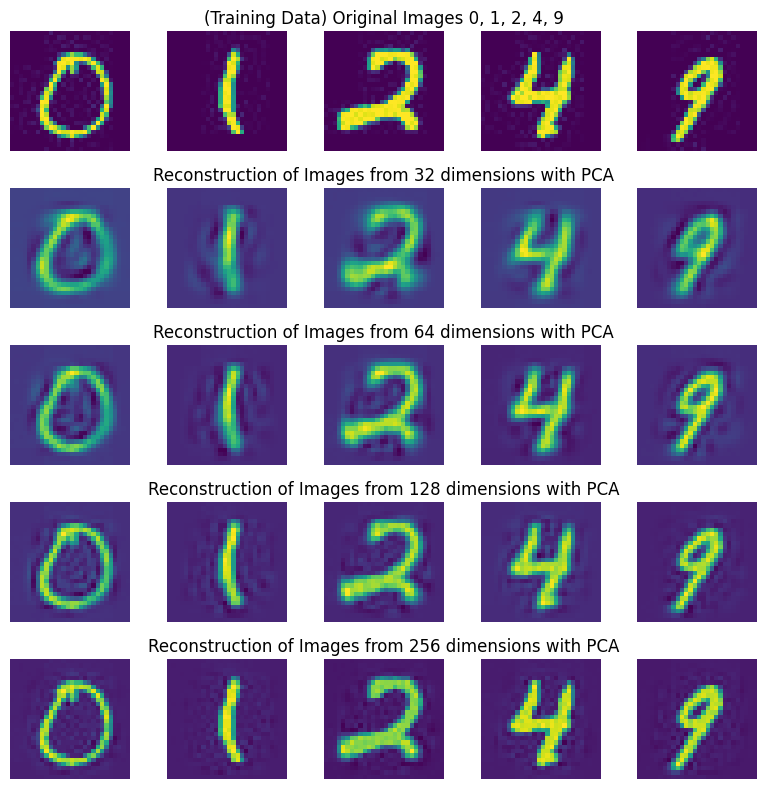

In [23]:
plotting_data(df_train, df_list_rec[0], 'Training Data')

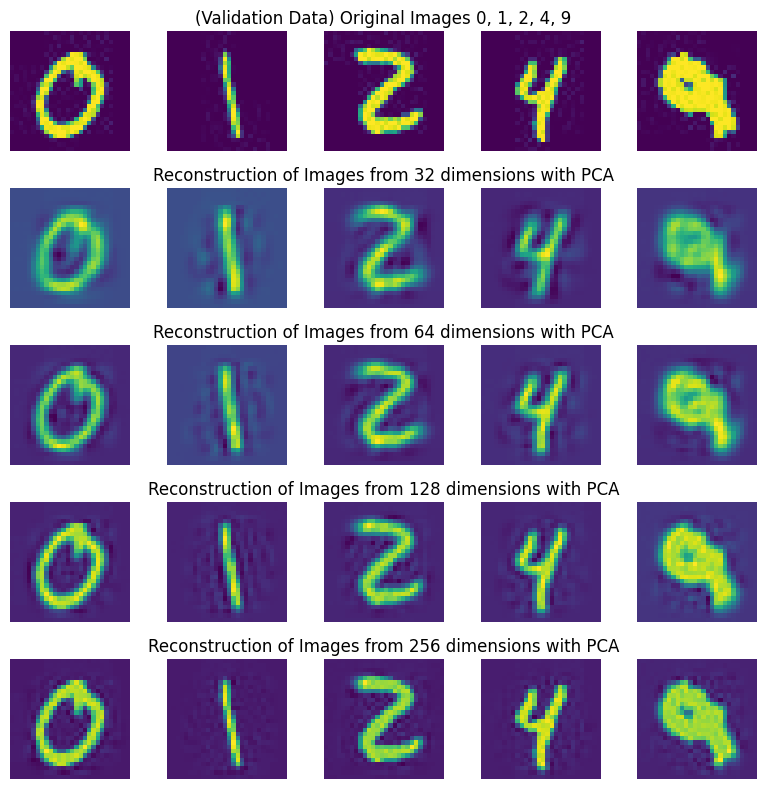

In [24]:
plotting_data(df_valid, df_list_rec[1], 'Validation Data')

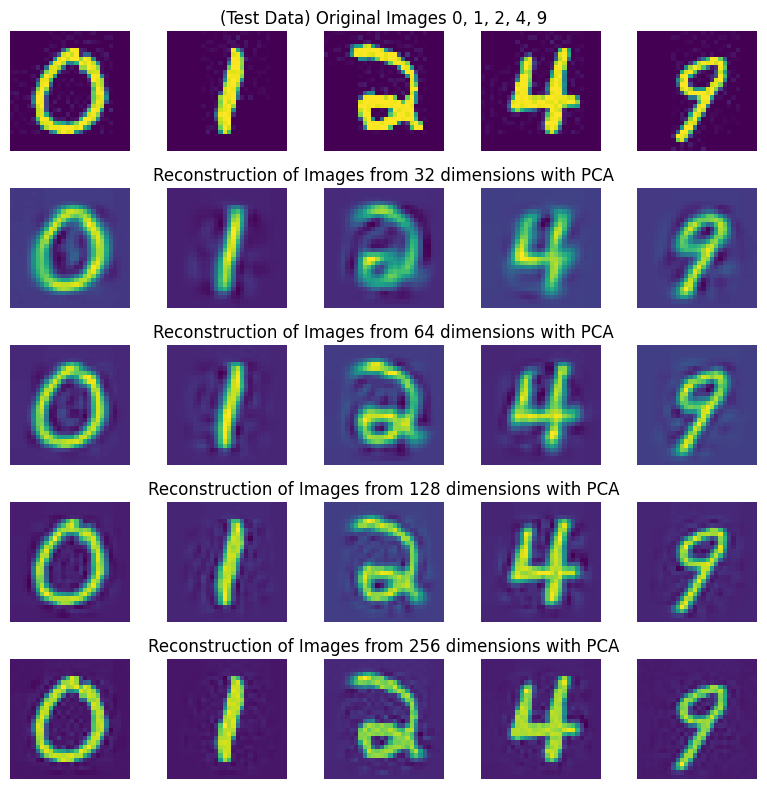

In [25]:
plotting_data(df_test, df_list_rec[2], 'Test Data')

#######################################
For components 32:
#######################################
Training Accuracy for model: 99.63%
Validation Accuracy for model: 98.45%
Test Accuracy for model: 98.39%


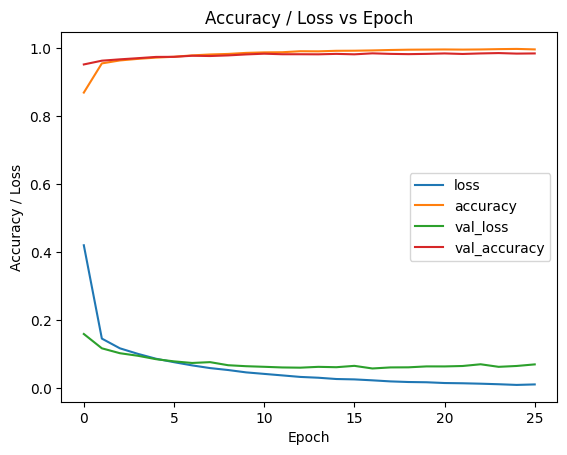

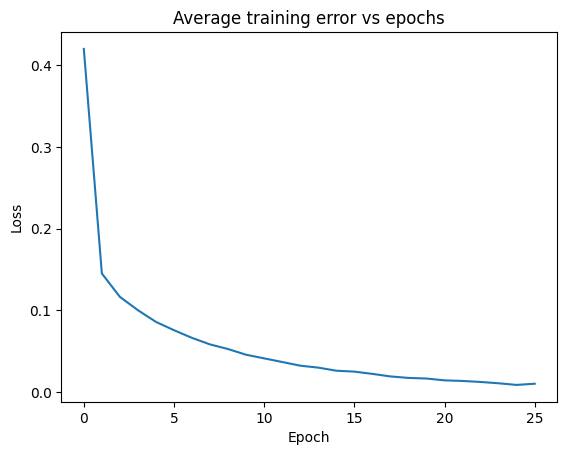

#######################################
For components 64:
#######################################
Training Accuracy for model: 99.84%
Validation Accuracy for model: 98.21%
Test Accuracy for model: 98.23%


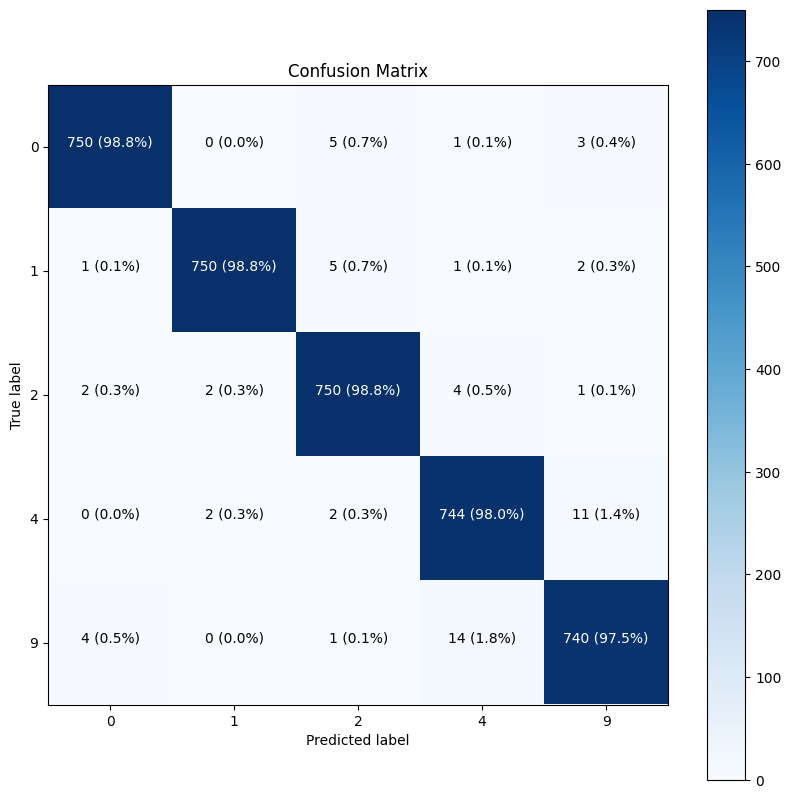

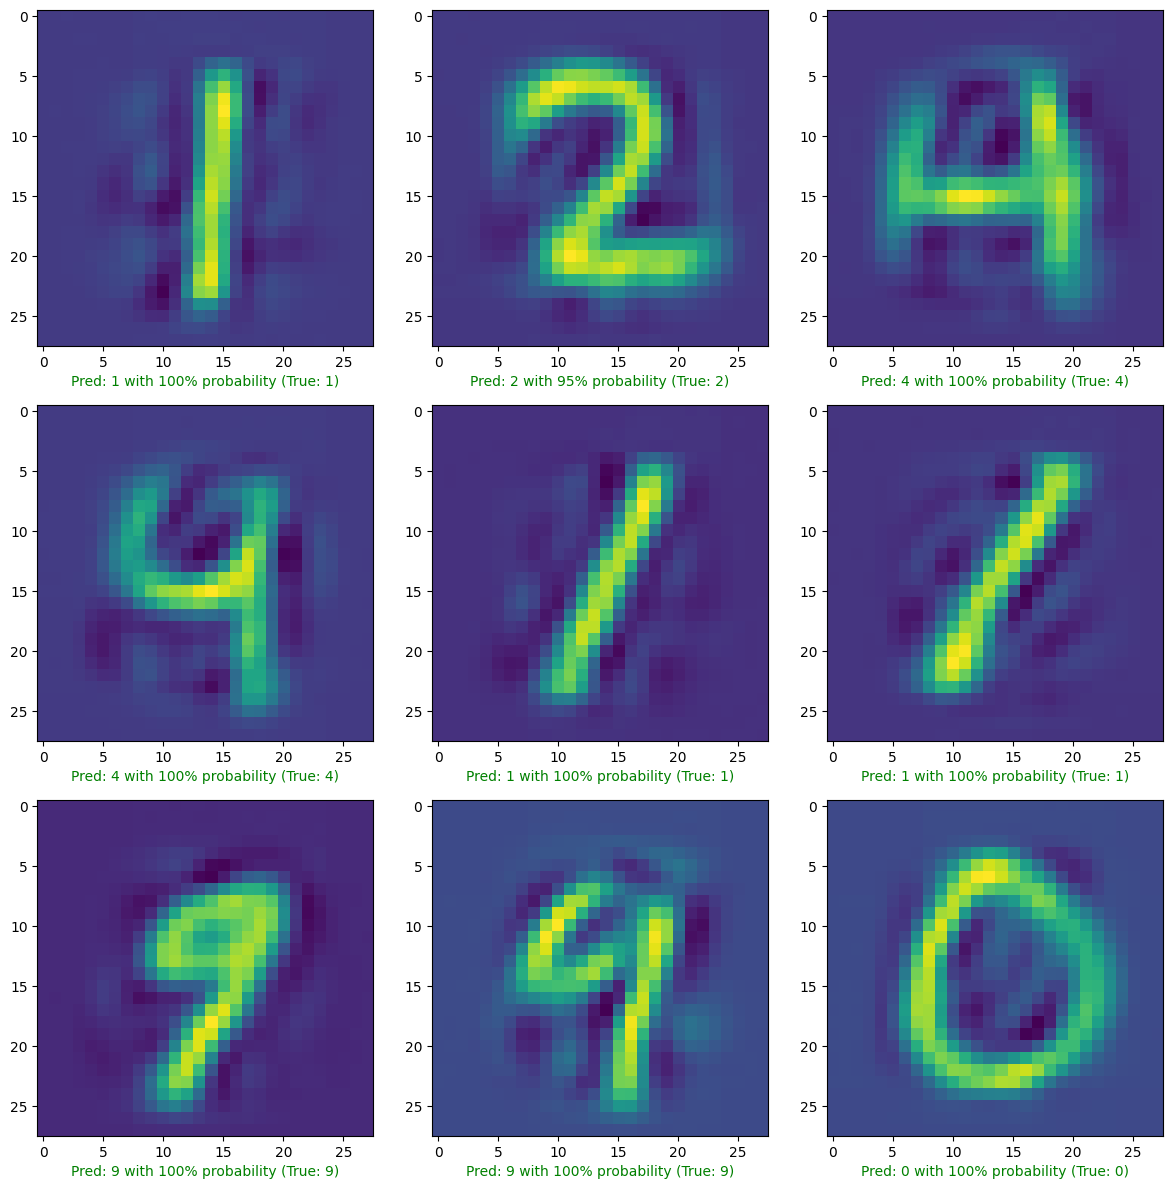

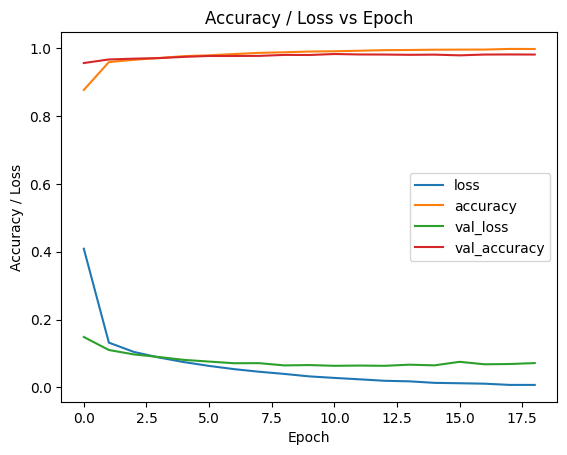

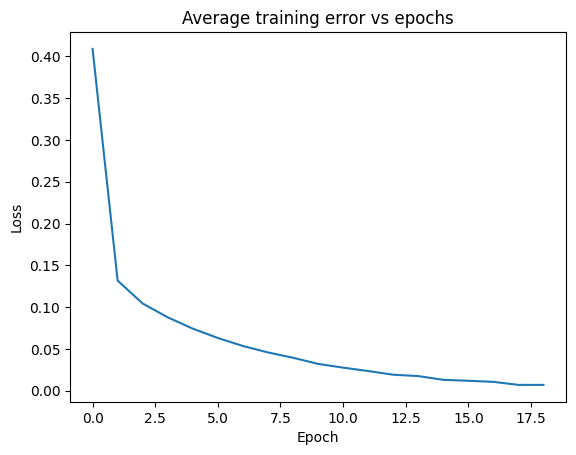

#######################################
For components 128:
#######################################
Training Accuracy for model: 99.93%
Validation Accuracy for model: 97.81%
Test Accuracy for model: 97.50%


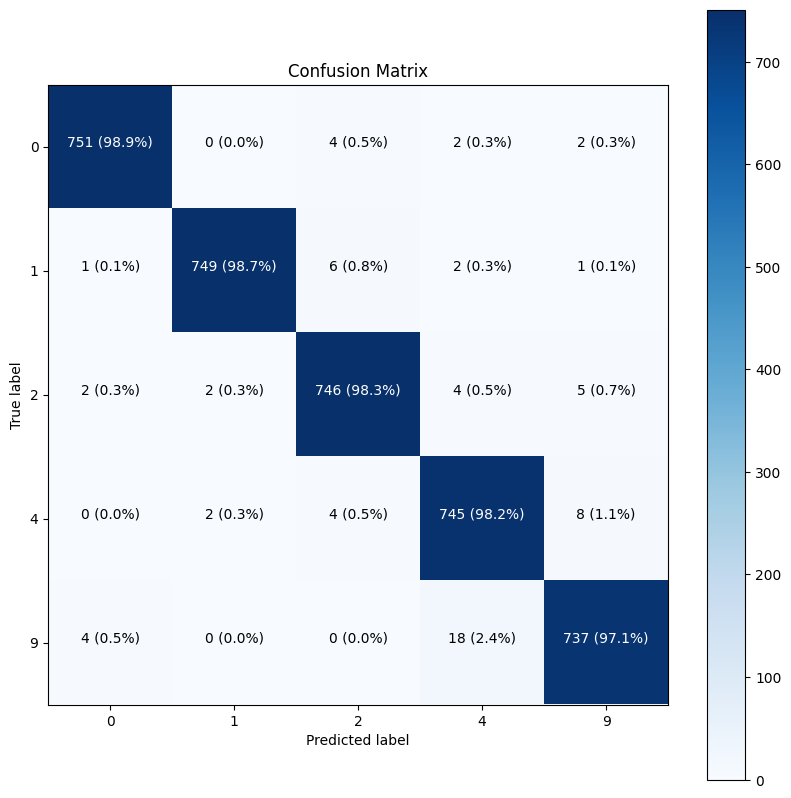

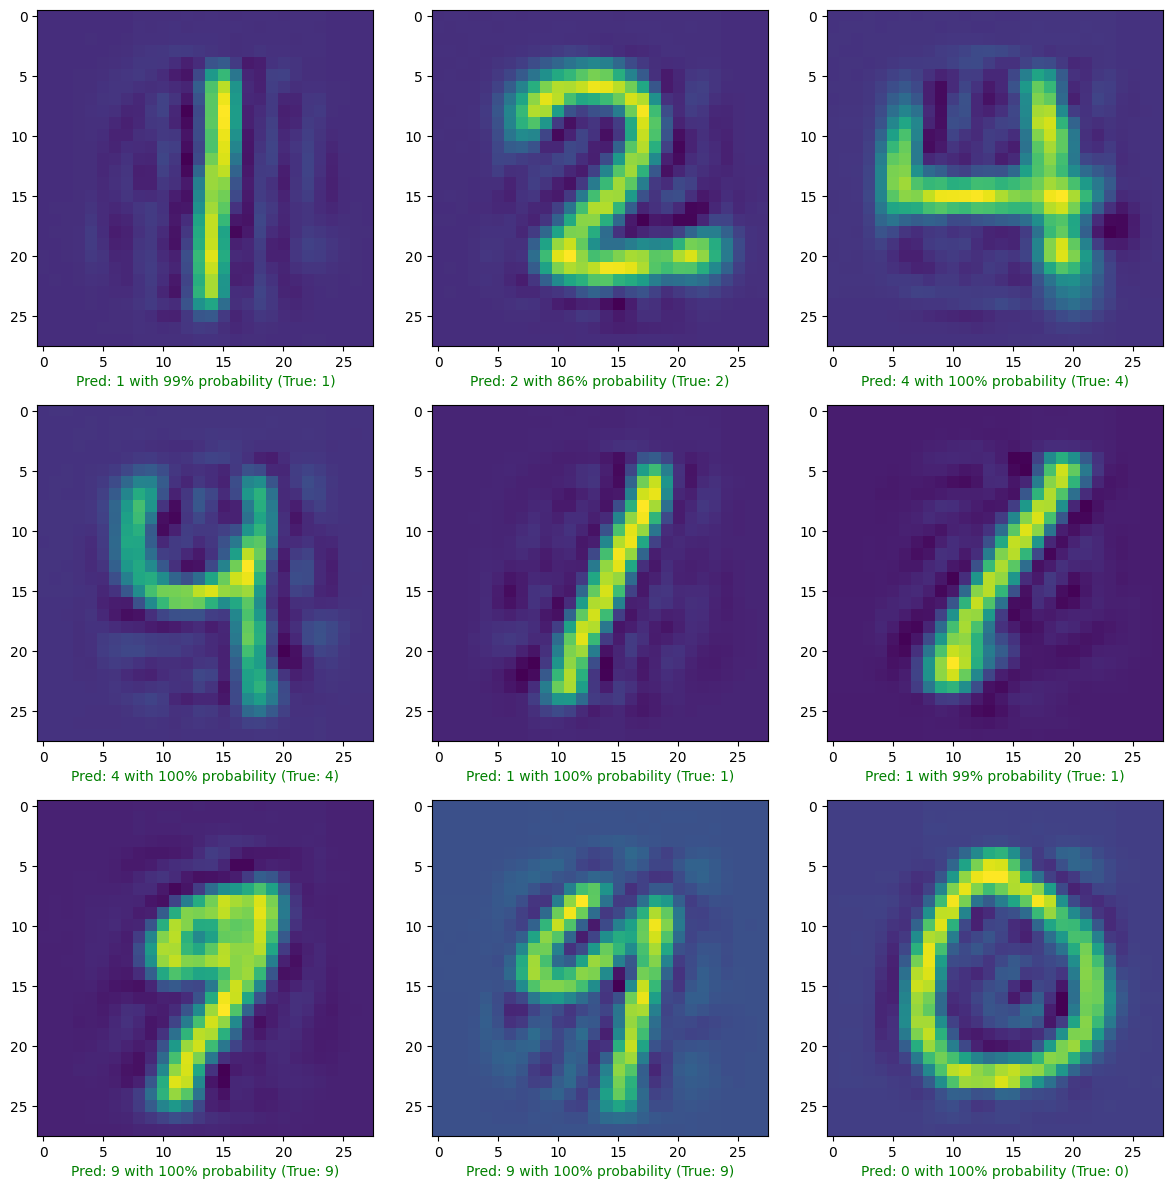

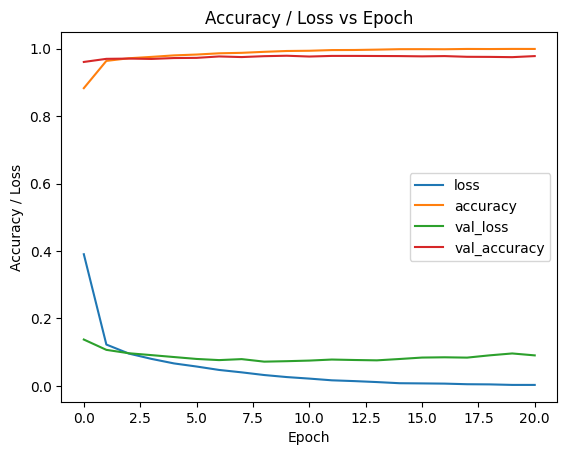

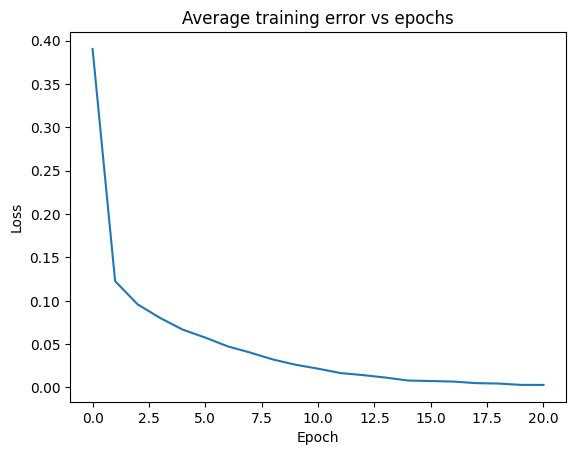

#######################################
For components 256:
#######################################
Training Accuracy for model: 99.82%
Validation Accuracy for model: 97.29%
Test Accuracy for model: 97.44%


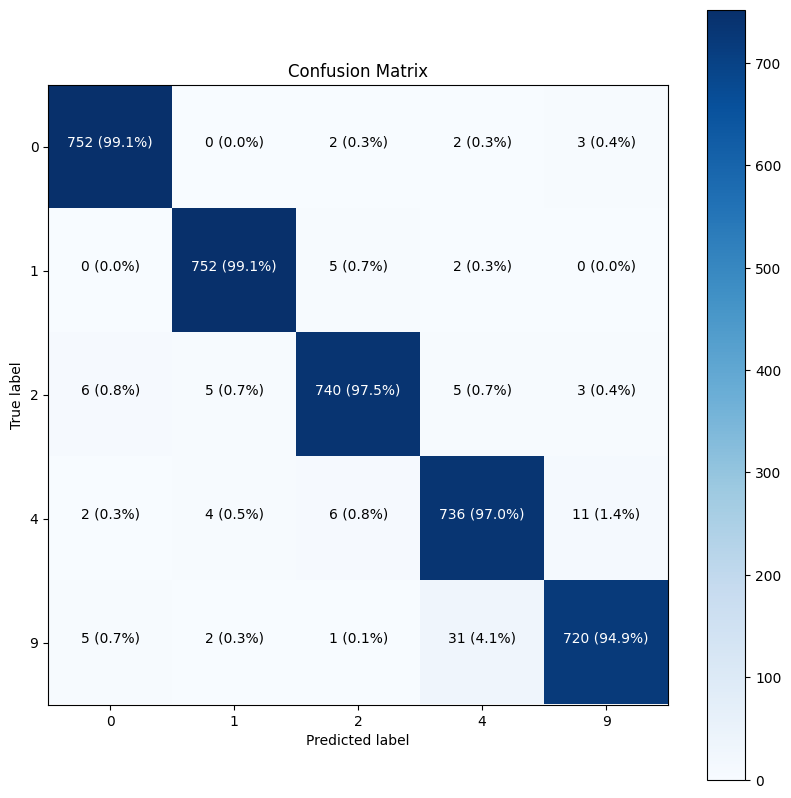

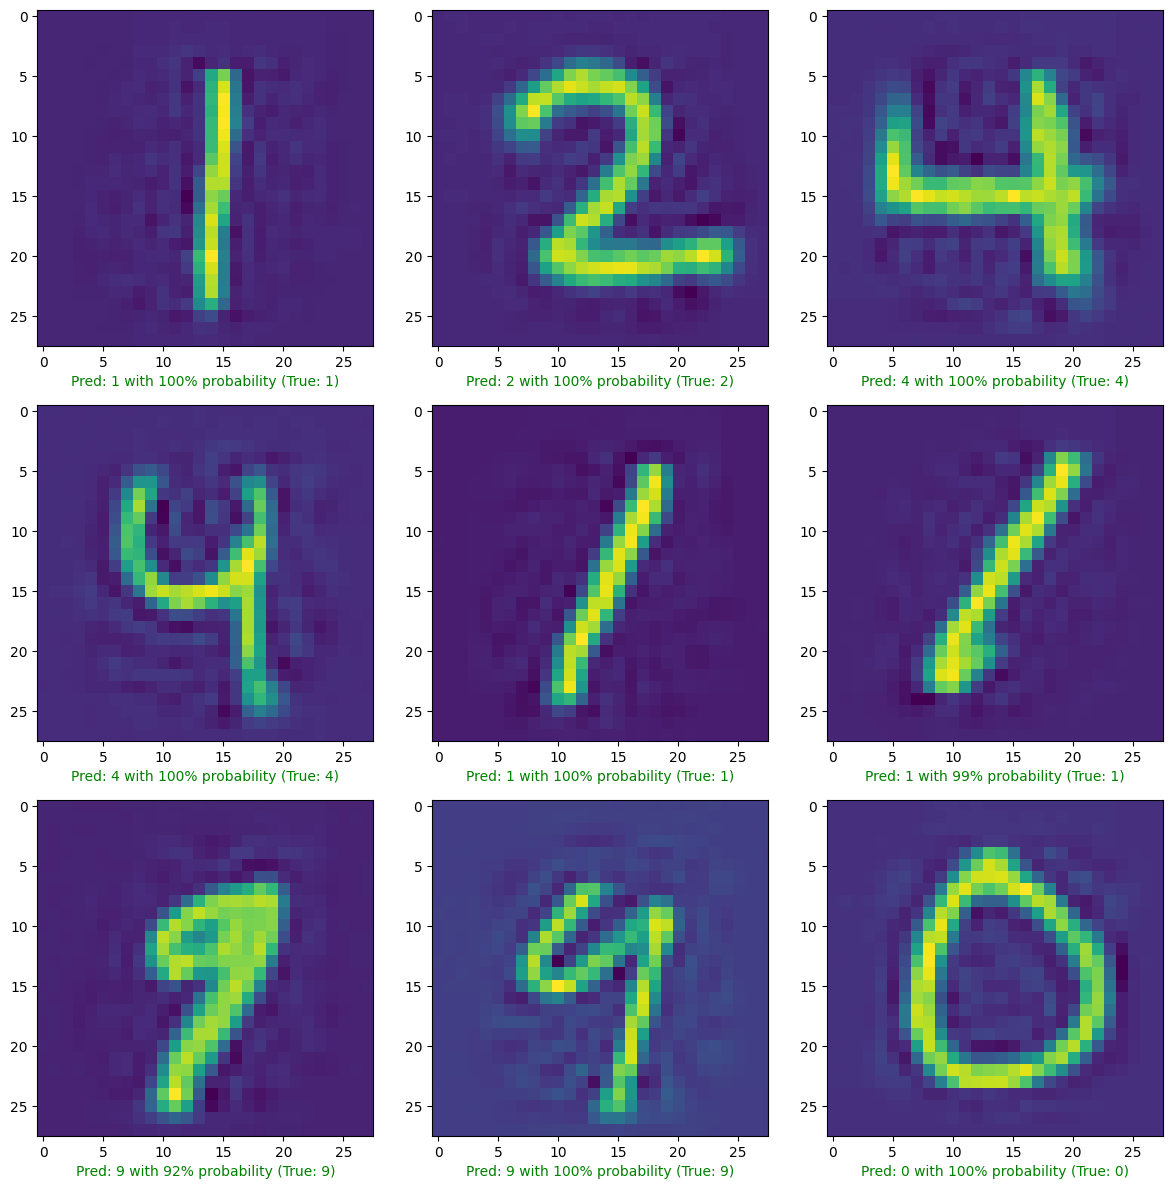

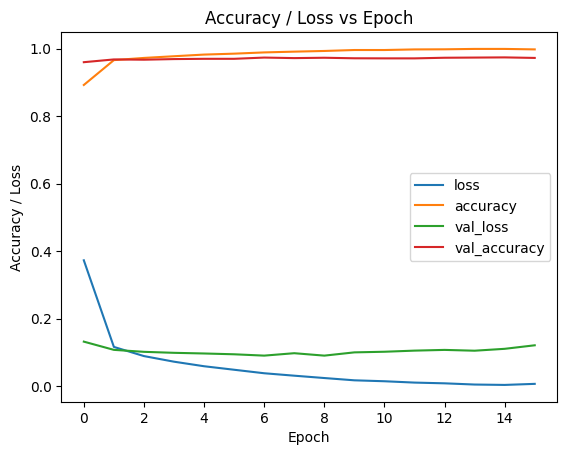

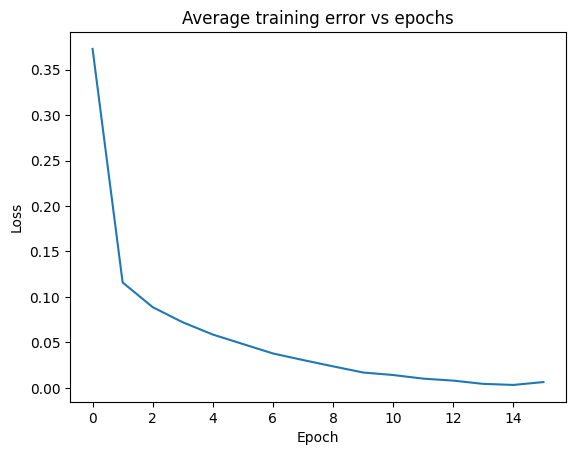

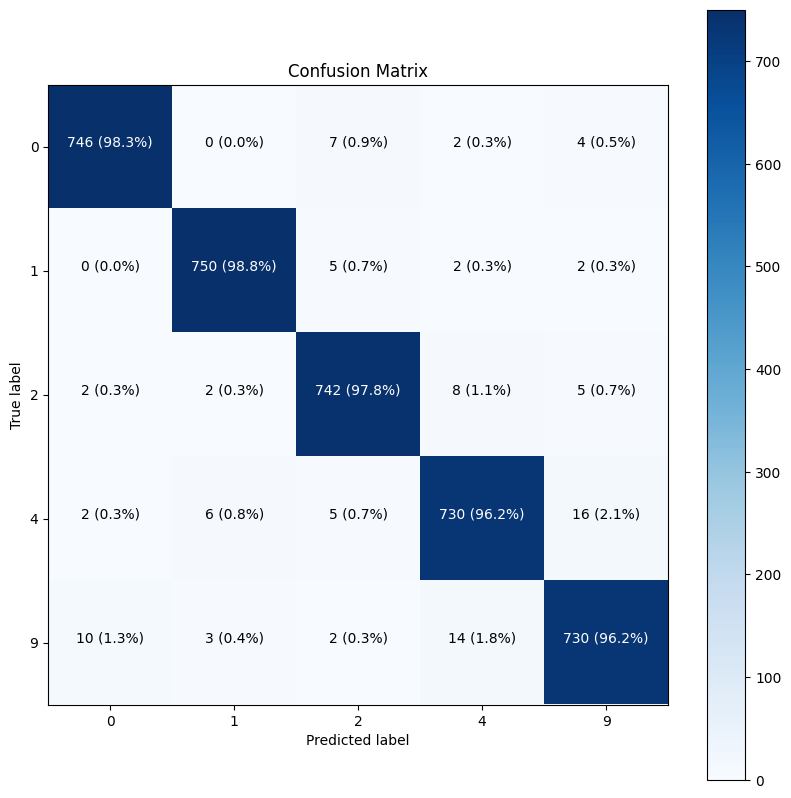

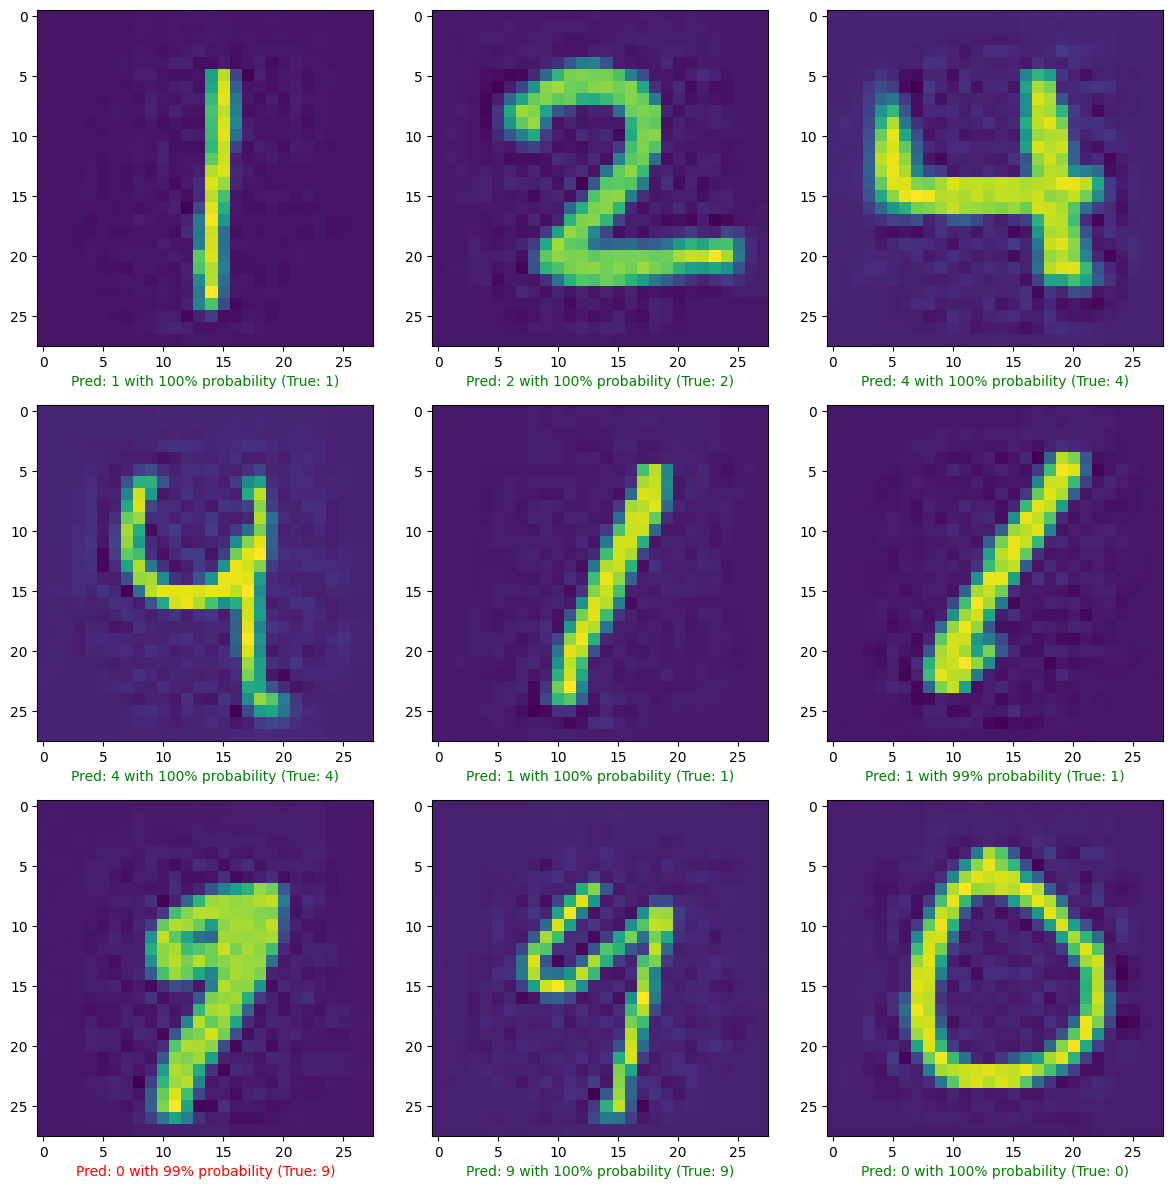

In [26]:
for i in range(len(n_components_list)):
    print('#######################################')
    print(f'For components {n_components_list[i]}:')
    print('#######################################')
    showResults(model_list[i], history_list[i], df_dict[i][1], n_components_list[i], df_dict_rec[i][2])

In [27]:
delete_folder_contents(pathfinal2)
for i in range(len(model_list)):
    plot_model(model_list[i].build_graph(),to_file=f'model_images/model_{n_components_list[i]}.png', show_shapes=True, show_layer_activations=True, expand_nested=True)

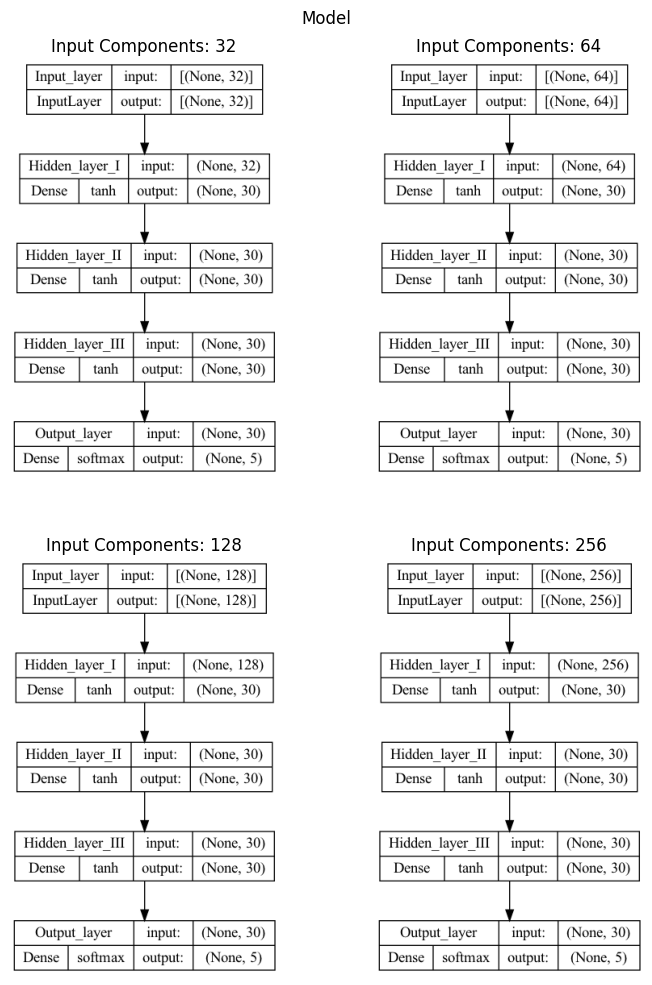

In [28]:

fig, axis = plt.subplots(2, 2, figsize=(8, 10))
axis = axis.reshape(-1)
# axis[i+2].set_title(f'({titile}) Original Images 0, 1, 2, 4, 9')
for i in range(4):
    axis[i].imshow(plt.imread(f'model_images/model_{n_components_list[i]}.png'))
    axis[i].set_title(f'Input Components: {n_components_list[i]}')
    axis[i].axis(False)

fig.suptitle('Model')
plt.tight_layout()
# plt.subplot_tool()
plt.subplots_adjust(
                    # left=0.1, 
                    # bottom=0.1,  
                    # right=0.9,  
                    # top=0.9,  
                    # wspace=0.4,  
                    hspace=0.2
                    ) 
plt.show()

In [29]:
delete_folder_contents(pathfinal2)
